In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!echo '{"username":"thanushareddy2811","key":"43698986907819c9c8663693ed18b051"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 18.1MB/s]


In [5]:
import pandas as pd

# Download the dataset
!kaggle datasets download -d mirichoi0218/insurance

# Unzip the dataset
!unzip insurance.zip

# Read the dataset into a pandas DataFrame
df = pd.read_csv('insurance.csv')

# Print the head of the DataFrame
print(df.head())

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  insurance.zip
  inflating: insurance.csv           
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
import pandas as pd
from tabulate import tabulate

#### Grouping and Aggregation

# Grouping and Aggregation
charges_by_age = df.groupby('age')['charges'].mean()
charges_by_sex = df.groupby('sex')['charges'].mean()
charges_by_bmi = df.groupby('bmi')['charges'].mean()
charges_by_children = df.groupby('children')['charges'].mean()
charges_by_smoker = df.groupby('smoker')['charges'].mean()
charges_by_region = df.groupby('region')['charges'].mean()

# Convert the grouping and aggregation results to a formatted table
table_age = tabulate(charges_by_age.reset_index(), headers='keys', tablefmt='psql')
table_sex = tabulate(charges_by_sex.reset_index(), headers='keys', tablefmt='psql')
table_bmi = tabulate(charges_by_bmi.reset_index(), headers='keys', tablefmt='psql')
table_children = tabulate(charges_by_children.reset_index(), headers='keys', tablefmt='psql')
table_smoker = tabulate(charges_by_smoker.reset_index(), headers='keys', tablefmt='psql')
table_region = tabulate(charges_by_region.reset_index(), headers='keys', tablefmt='psql')

# Print the formatted tables
print("Mean charges by age:\n", table_age)
print("Mean charges by sex:\n", table_sex)
print("Mean charges by BMI:\n", table_bmi)
print("Mean charges by children:\n", table_children)
print("Mean charges by smoker:\n", table_smoker)
print("Mean charges by region:\n", table_region)


Mean charges by age:
 +----+-------+-----------+
|    |   age |   charges |
|----+-------+-----------|
|  0 |    18 |   7086.22 |
|  1 |    19 |   9747.91 |
|  2 |    20 |  10159.7  |
|  3 |    21 |   4730.46 |
|  4 |    22 |  10012.9  |
|  5 |    23 |  12419.8  |
|  6 |    24 |  10648    |
|  7 |    25 |   9838.37 |
|  8 |    26 |   6133.83 |
|  9 |    27 |  12184.7  |
| 10 |    28 |   9069.19 |
| 11 |    29 |  10430.2  |
| 12 |    30 |  12719.1  |
| 13 |    31 |  10197    |
| 14 |    32 |   9220.3  |
| 15 |    33 |  12351.5  |
| 16 |    34 |  11613.5  |
| 17 |    35 |  11307.2  |
| 18 |    36 |  12204.5  |
| 19 |    37 |  18019.9  |
| 20 |    38 |   8102.73 |
| 21 |    39 |  11778.2  |
| 22 |    40 |  11772.3  |
| 23 |    41 |   9653.75 |
| 24 |    42 |  13061    |
| 25 |    43 |  19267.3  |
| 26 |    44 |  15859.4  |
| 27 |    45 |  14830.2  |
| 28 |    46 |  14342.6  |
| 29 |    47 |  17654    |
| 30 |    48 |  14632.5  |
| 31 |    49 |  12696    |
| 32 |    50 |  15663    |
| 33 |

In [8]:
#### Method 2: Cross-Tabulation

# Cross-Tabulation
cross_tab_age = pd.crosstab(df['age'], df['charges'])
cross_tab_bmi = pd.crosstab(df['bmi'], df['charges'])
cross_tab_children = pd.crosstab(df['children'], df['charges'])

# Convert the cross-tabulation results to a formatted table
table_age = tabulate(cross_tab_age, headers='keys', tablefmt='psql')
table_bmi = tabulate(cross_tab_bmi, headers='keys', tablefmt='psql')
table_children = tabulate(cross_tab_children, headers='keys', tablefmt='psql')

# Print the formatted tables
print("Cross-tabulation of charges by age:\n", table_age)
print("Cross-tabulation of charges by bmi:\n", table_bmi)
print("Cross-tabulation of charges by children:\n", table_children)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
import pandas as pd

#### Correlation Analysis

# Calculate the correlation coefficients
correlation_age = df['age'].corr(df['charges'])
correlation_bmi = df['bmi'].corr(df['charges'])
correlation_children = df['children'].corr(df['charges'])

# Convert categorical variables to numerical using label encoding
df['sex'] = df['sex'].astype('category').cat.codes
df['region'] = df['region'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes

correlation_sex = df['sex'].corr(df['charges'])
correlation_region = df['region'].corr(df['charges'])
correlation_smoker = df['smoker'].corr(df['charges'])

# Print the results
print("Correlation between age and charges:", correlation_age)
print("Correlation between BMI and charges:", correlation_bmi)
print("Correlation between children and charges:", correlation_children)
print("Correlation between sex and charges:", correlation_sex)
print("Correlation between region and charges:", correlation_region)
print("Correlation between smoker and charges:", correlation_smoker)


Correlation between age and charges: 0.29900819333064754
Correlation between BMI and charges: 0.19834096883362895
Correlation between children and charges: 0.0679982268479048
Correlation between sex and charges: 0.05729206220202548
Correlation between region and charges: -0.006208234909444512
Correlation between smoker and charges: 0.7872514304984779


In [10]:
import pandas as pd
#### Correlation Analysis

# Calculate the correlation coefficients
correlation_age = df['age'].corr(df['charges'])
correlation_bmi = df['bmi'].corr(df['charges'])
correlation_children = df['children'].corr(df['charges'])

# Print the results
print("Correlation between age and charges:", correlation_age)
print("Correlation between BMI and charges:", correlation_bmi)
print("Correlation between children and charges:", correlation_children)


Correlation between age and charges: 0.29900819333064754
Correlation between BMI and charges: 0.19834096883362895
Correlation between children and charges: 0.0679982268479048


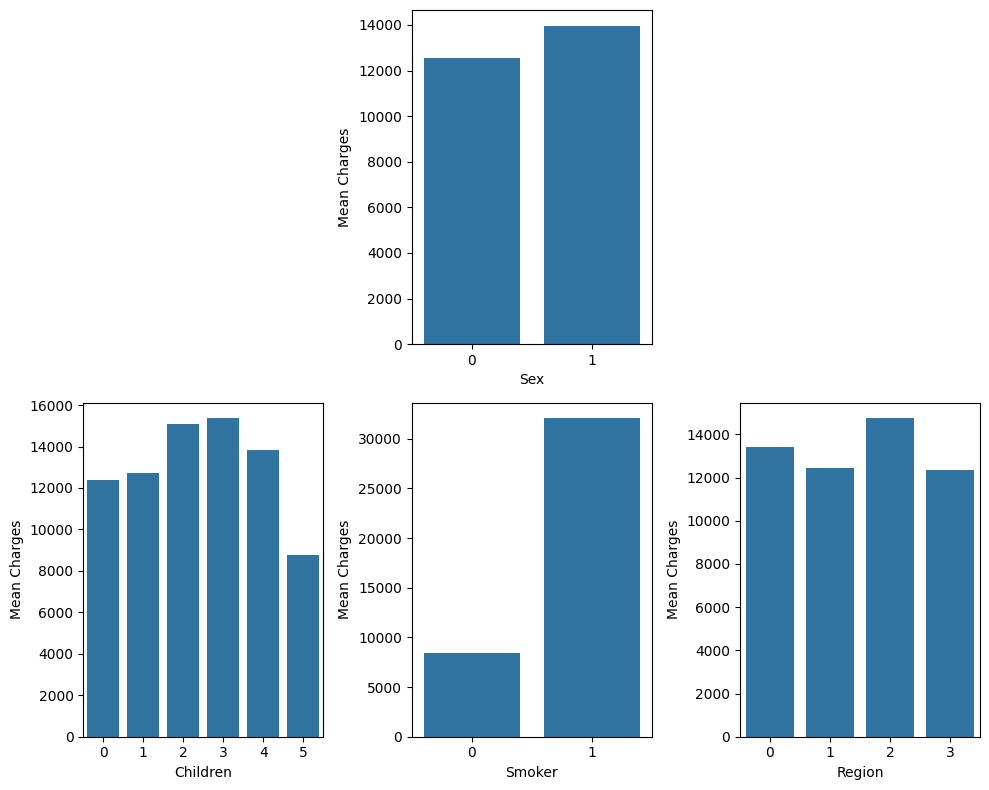

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and Aggregation
charges_by_age = df.groupby('age')['charges'].mean()
charges_by_sex = df.groupby('sex')['charges'].mean()
charges_by_bmi = df.groupby('bmi')['charges'].mean()
charges_by_children = df.groupby('children')['charges'].mean()
charges_by_smoker = df.groupby('smoker')['charges'].mean()
charges_by_region = df.groupby('region')['charges'].mean()

# Create bar plots
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 2)
sns.barplot(x=charges_by_sex.index, y=charges_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Mean Charges')

plt.subplot(2, 3, 4)
sns.barplot(x=charges_by_children.index, y=charges_by_children.values)
plt.xlabel('Children')
plt.ylabel('Mean Charges')

plt.subplot(2, 3, 5)
sns.barplot(x=charges_by_smoker.index, y=charges_by_smoker.values)
plt.xlabel('Smoker')
plt.ylabel('Mean Charges')

plt.subplot(2, 3, 6)
sns.barplot(x=charges_by_region.index, y=charges_by_region.values)
plt.xlabel('Region')
plt.ylabel('Mean Charges')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Mean Charges')

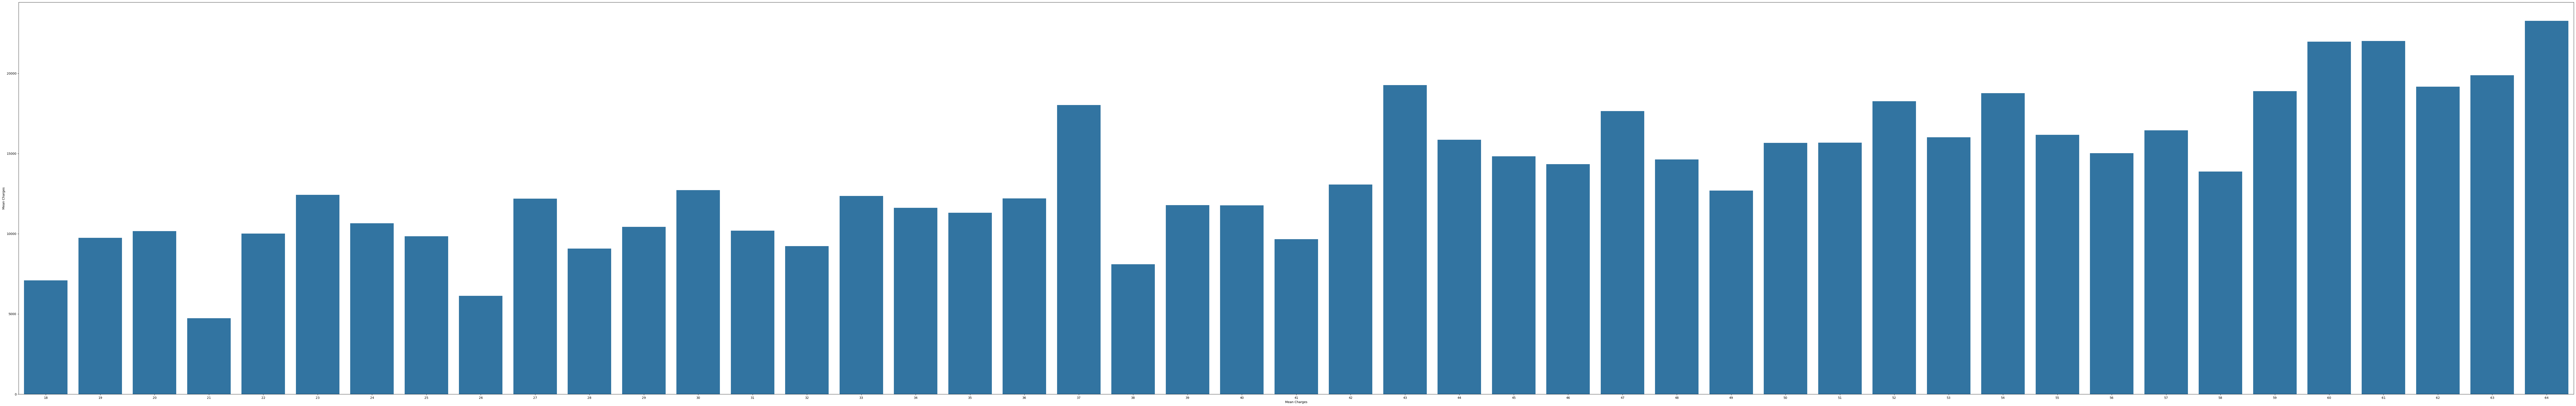

In [12]:
# Create bar plots
plt.figure(figsize=(500, 50))
plt.subplot(2, 3, 1)
sns.barplot(x=charges_by_age.index, y=charges_by_age.values)
plt.xlabel('Mean Charges')
plt.ylabel('Mean Charges')

Text(0, 0.5, 'Mean Charges')

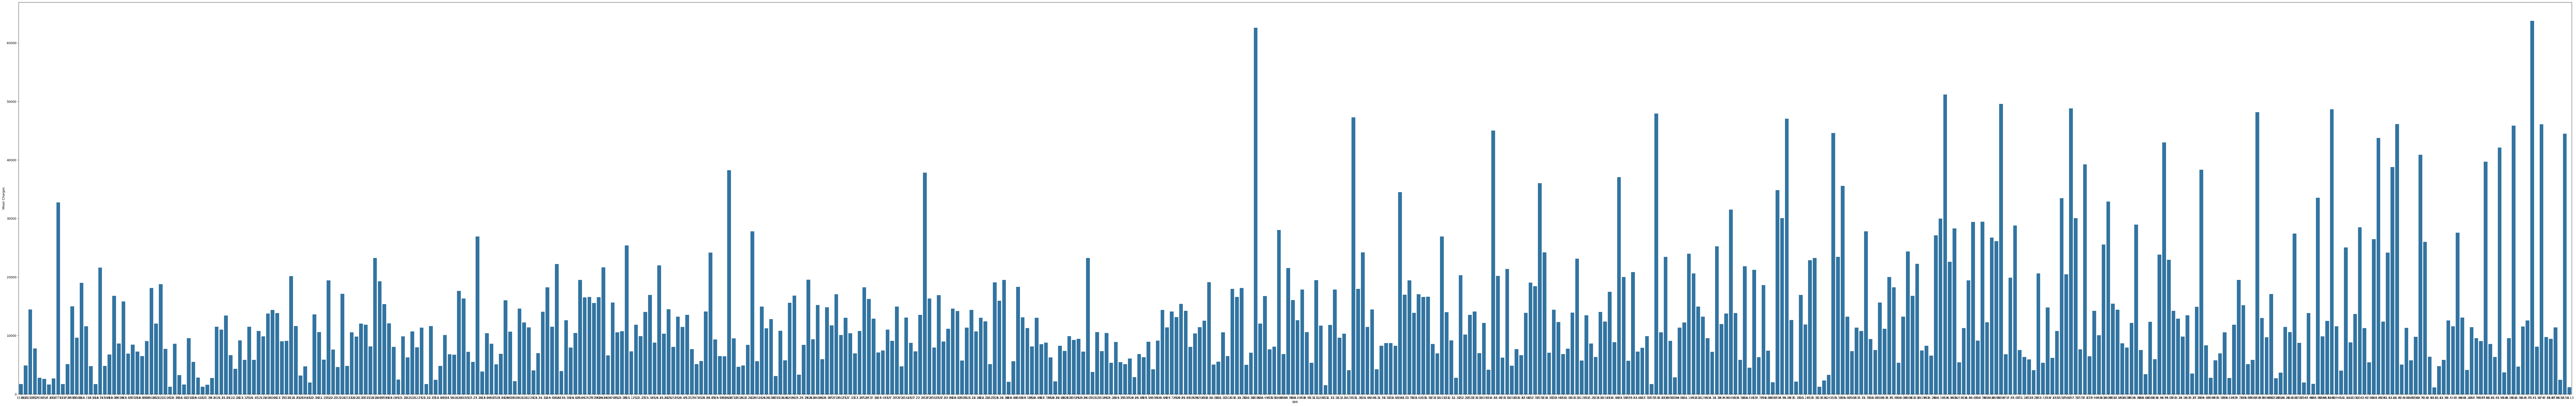

In [13]:
# Create bar plots
plt.figure(figsize=(500, 50))
plt.subplot(2, 3, 3)
sns.barplot(x=charges_by_bmi.index, y=charges_by_bmi.values)
plt.xlabel('BMI')
plt.ylabel('Mean Charges')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


In [15]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [16]:
df[['sex']].value_counts()

sex
1      676
0      662
Name: count, dtype: int64

In [17]:
df[['age']].value_counts()

age
18     69
19     68
20     29
51     29
45     29
46     29
47     29
48     29
50     29
52     29
28     28
54     28
21     28
27     28
26     28
49     28
25     28
24     28
23     28
22     28
53     28
42     27
44     27
43     27
41     27
40     27
31     27
30     27
29     27
56     26
34     26
33     26
32     26
57     26
55     26
35     25
59     25
58     25
36     25
39     25
38     25
37     25
60     23
61     23
62     23
63     23
64     22
Name: count, dtype: int64

In [18]:
df[['bmi']].value_counts()

bmi   
32.300    13
28.310     9
30.875     8
31.350     8
28.880     8
          ..
28.800     1
28.490     1
28.380     1
28.200     1
53.130     1
Name: count, Length: 548, dtype: int64

In [19]:
df[['children']].value_counts()

children
0           574
1           324
2           240
3           157
4            25
5            18
Name: count, dtype: int64

In [20]:
df[['smoker']].value_counts()

smoker
0         1064
1          274
Name: count, dtype: int64

In [21]:
df[['region']].value_counts()

region
2         364
1         325
3         325
0         324
Name: count, dtype: int64

In [22]:
df[['charges']].value_counts()

charges    
1639.56310     2
12741.16745    1
12949.15540    1
12928.79110    1
12925.88600    1
              ..
6272.47720     1
6250.43500     1
6238.29800     1
6203.90175     1
63770.42801    1
Name: count, Length: 1337, dtype: int64

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
df.shape

(1338, 7)

In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

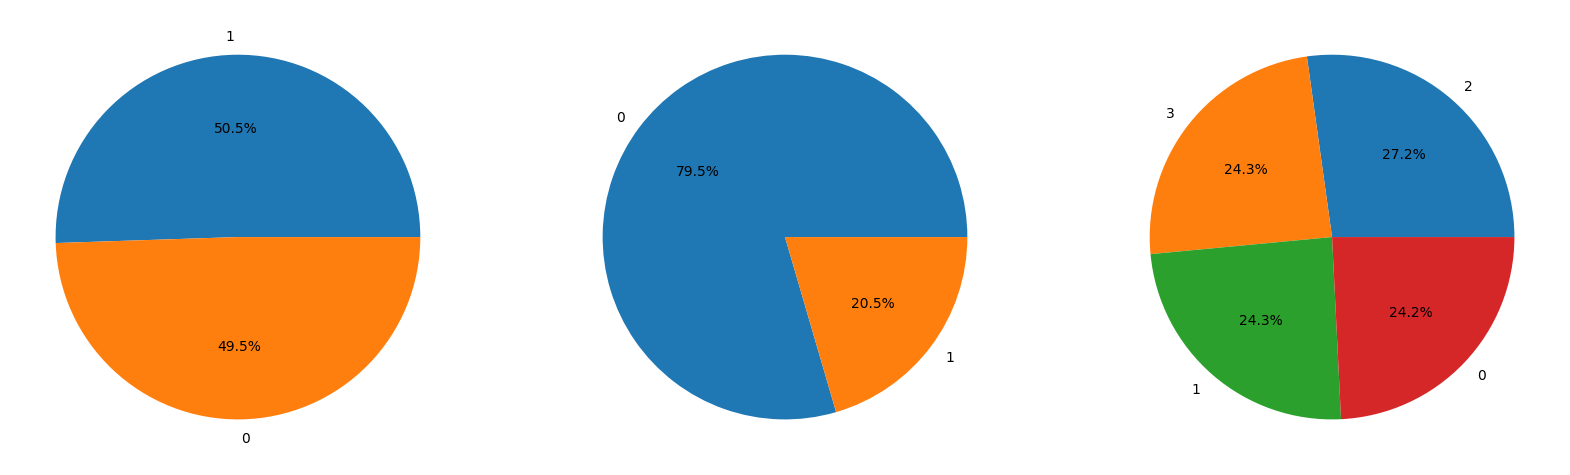

In [27]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for i, col in enumerate(features):
    x = df[col].value_counts()
    axs[i].pie(x.values, labels=x.index, autopct='%1.1f%%')

plt.show()


Data distribution analysys


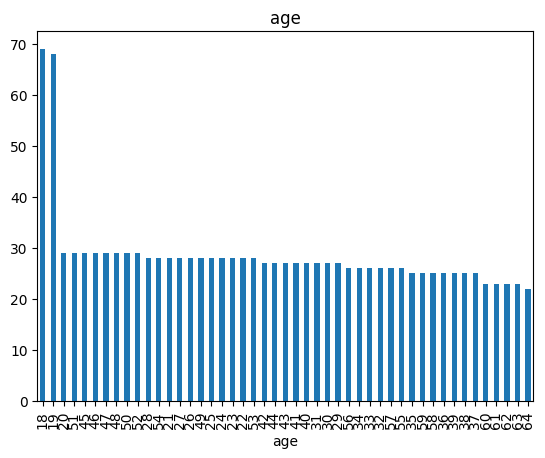

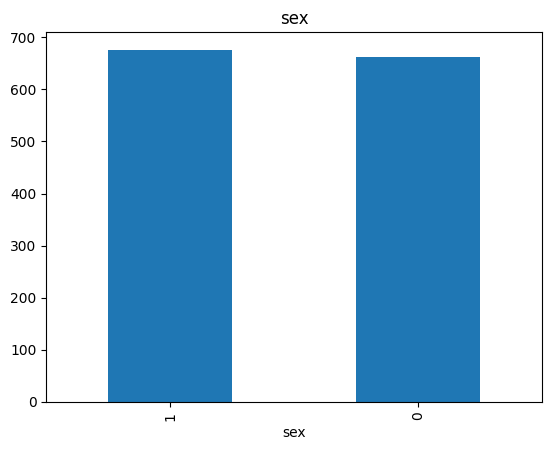

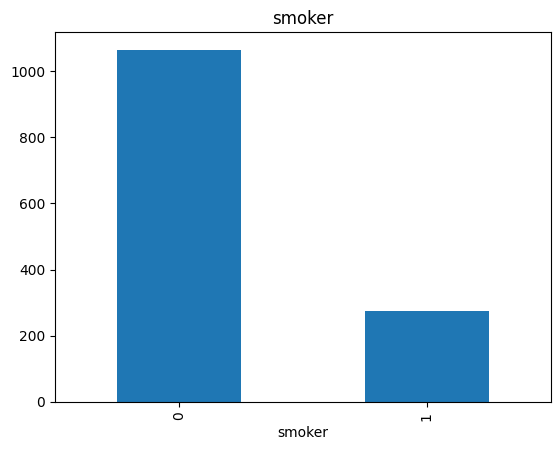

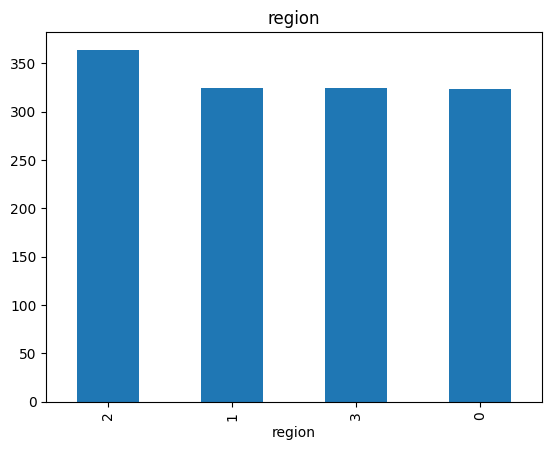

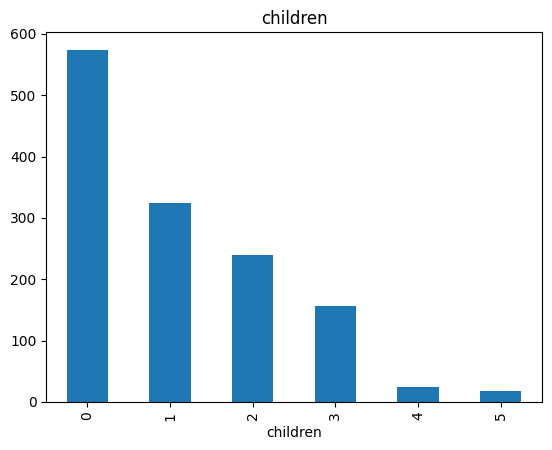

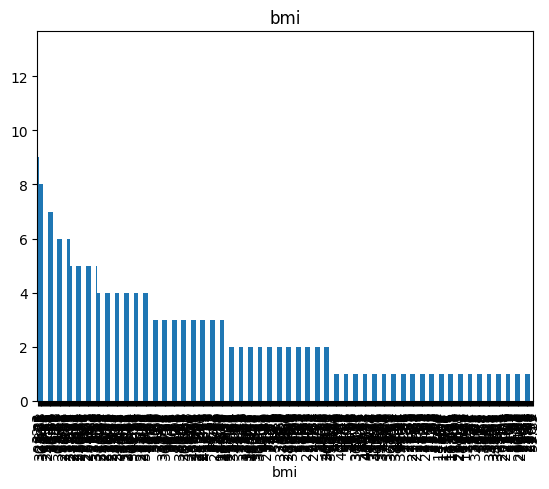

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['age','sex','smoker','region','children','bmi']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to each non-numeric column
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Now, the non-numeric columns are converted to numeric types using label encoding


Mean cost analysis:


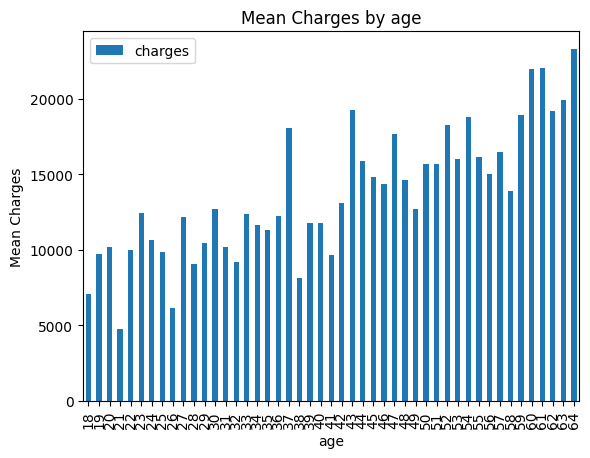

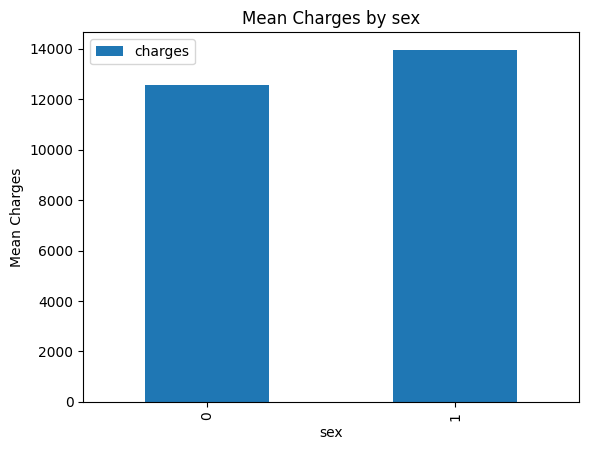

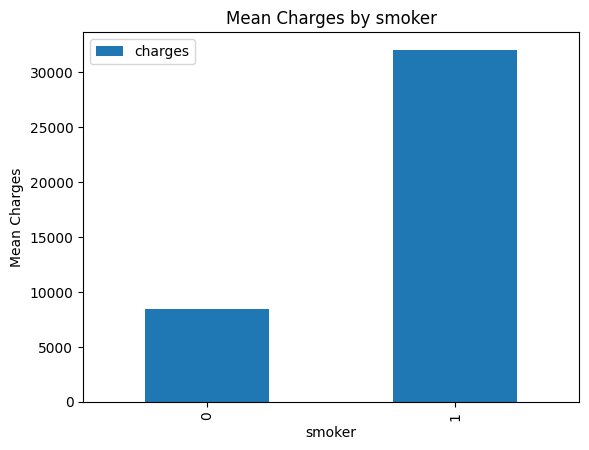

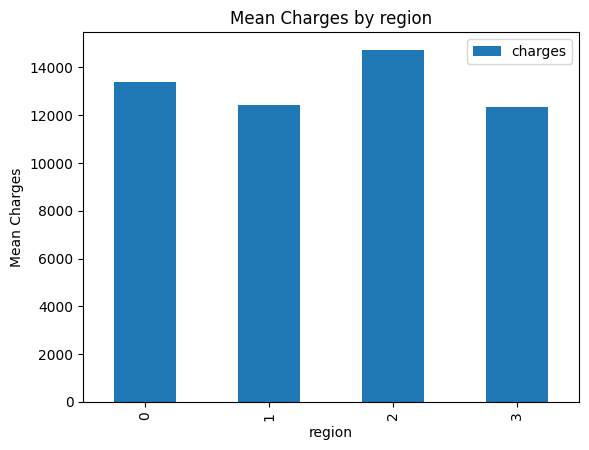

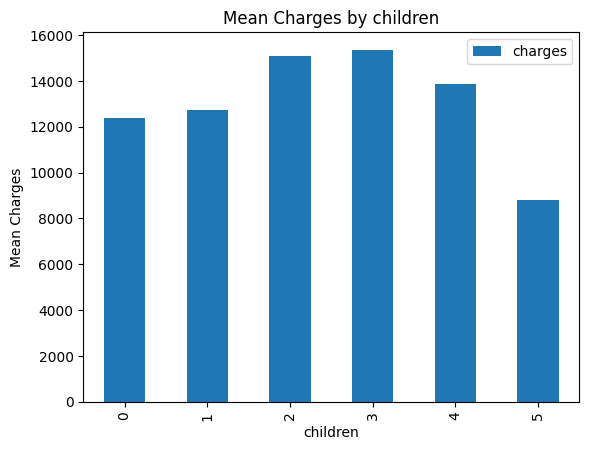

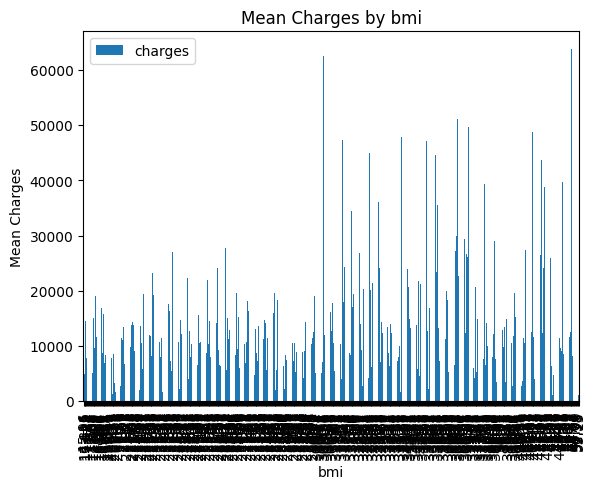

In [30]:
print('Mean cost analysis:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y='charges', kind='bar')
    plt.title(f'Mean Charges by {v}')
    plt.xlabel(v)
    plt.ylabel('Mean Charges')
    plt.show()

<Axes: xlabel='sex', ylabel='charges'>

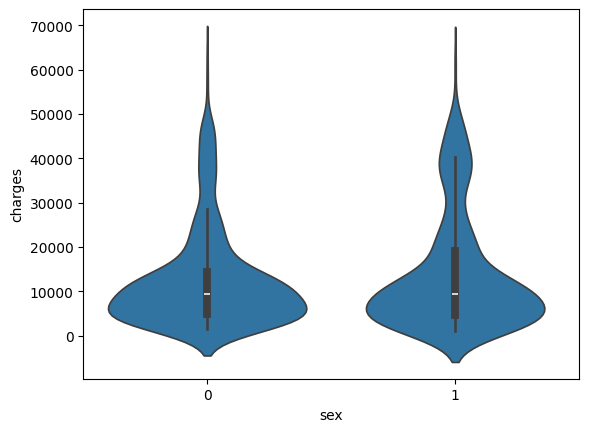

In [31]:
sns.violinplot(x='sex', y='charges',data=df)

<Axes: xlabel='smoker', ylabel='charges'>

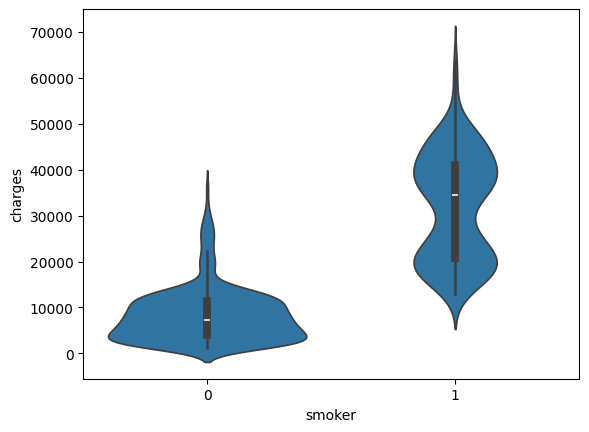

In [32]:
sns.violinplot(x='smoker', y='charges',data=df)

<Axes: xlabel='region', ylabel='charges'>

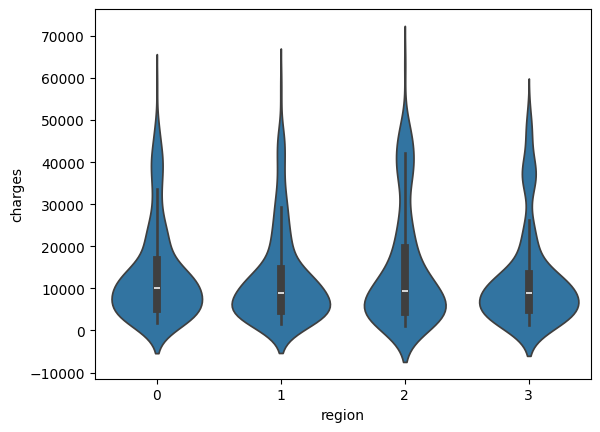

In [33]:
sns.violinplot(x='region', y='charges',data=df)

<Axes: xlabel='sex', ylabel='charges'>

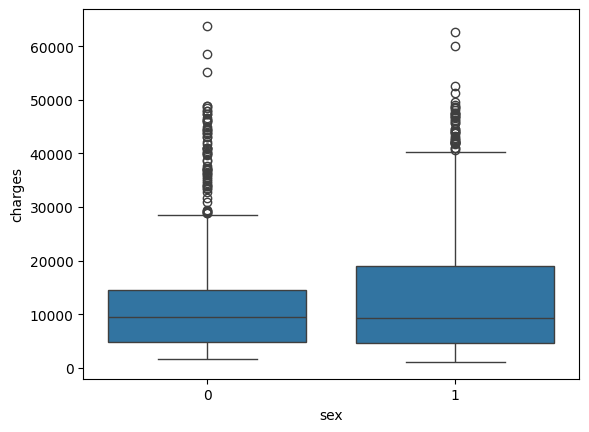

In [34]:
sns.boxplot(x='sex', y='charges',data=df)

<Axes: xlabel='age', ylabel='charges'>

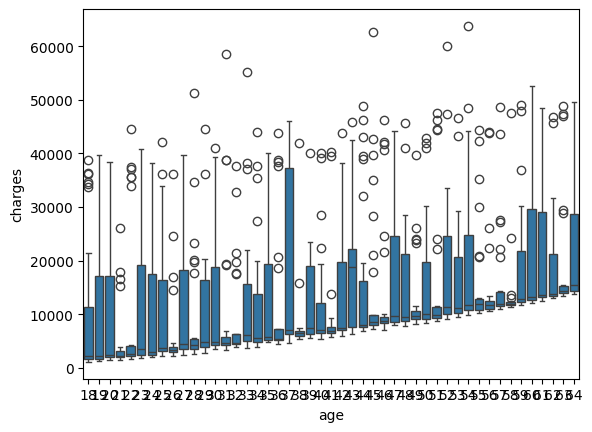

In [35]:
sns.boxplot(x='age', y='charges',data=df)

<Axes: xlabel='bmi', ylabel='charges'>

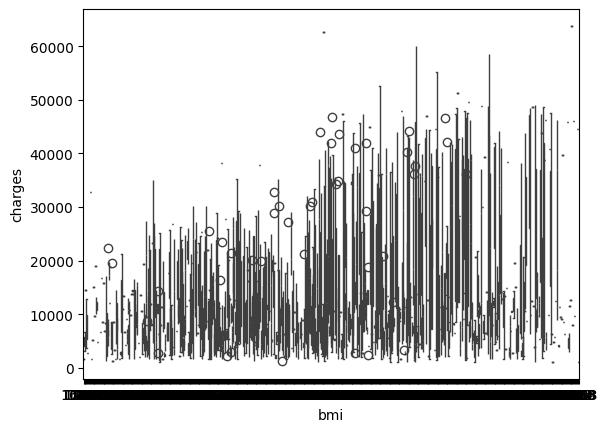

In [36]:
sns.boxplot(x='bmi', y='charges',data=df)

<Axes: xlabel='smoker', ylabel='charges'>

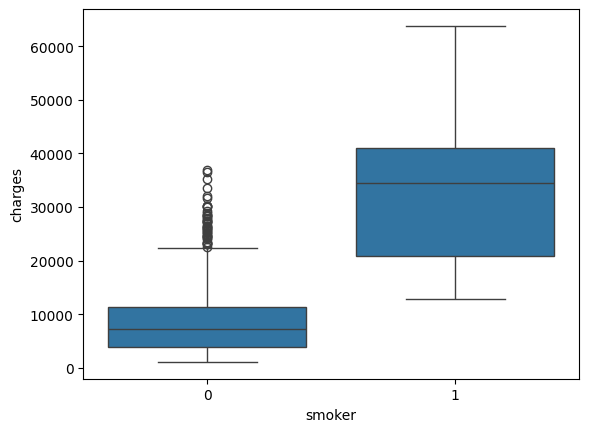

In [37]:
sns.boxplot(x='smoker', y='charges',data=df)

<Axes: xlabel='children', ylabel='charges'>

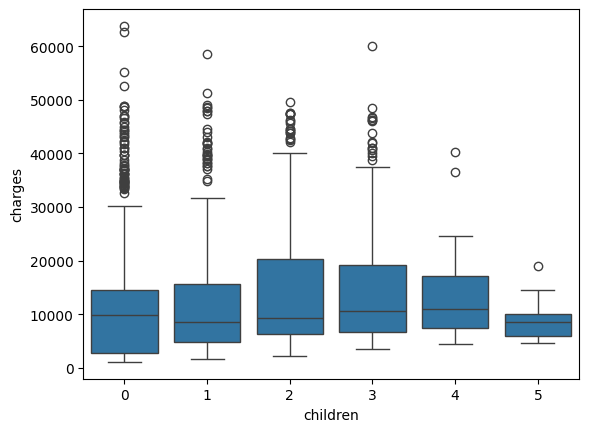

In [38]:
sns.boxplot(x='children', y='charges',data=df)

<Axes: xlabel='region', ylabel='charges'>

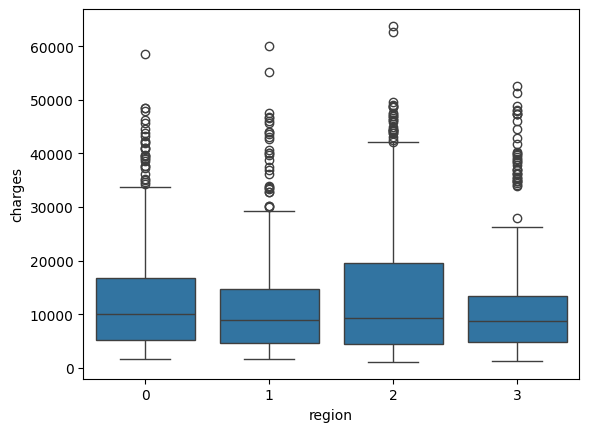

In [39]:
sns.boxplot(x='region', y='charges',data=df)

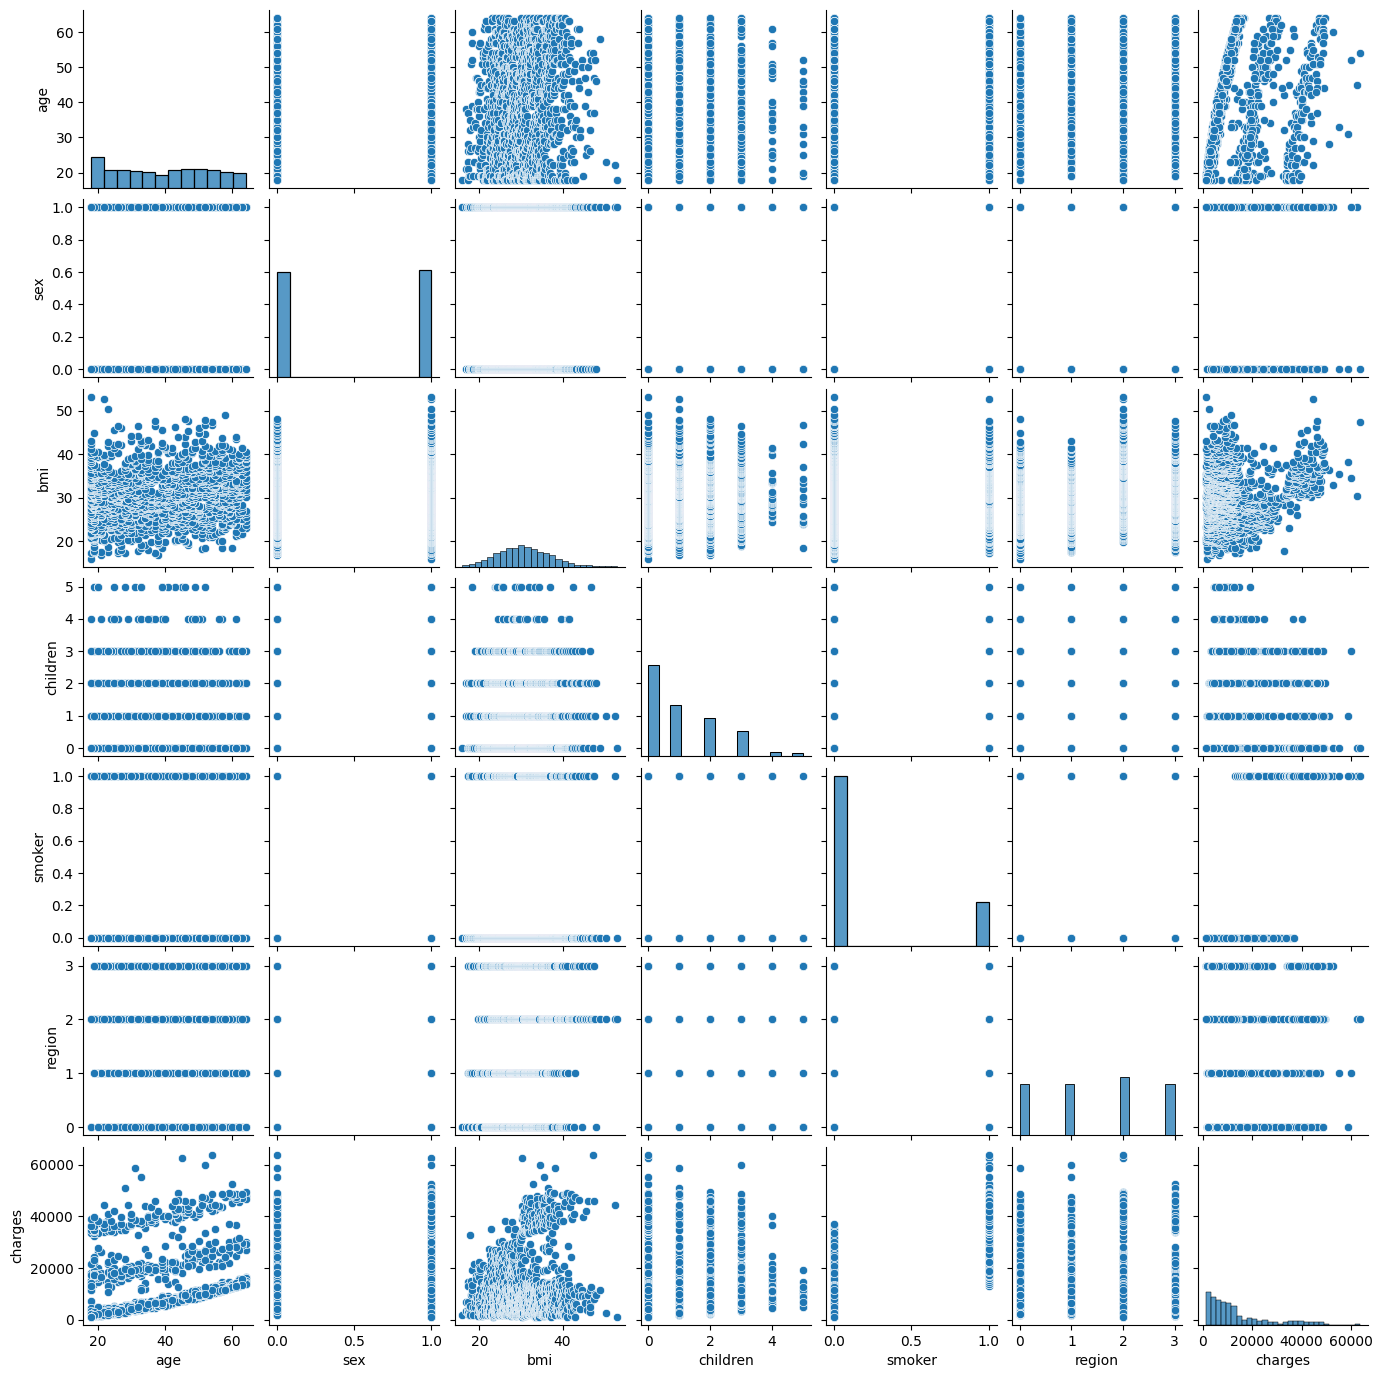

In [40]:
sns.pairplot(df, size=2)

In [41]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


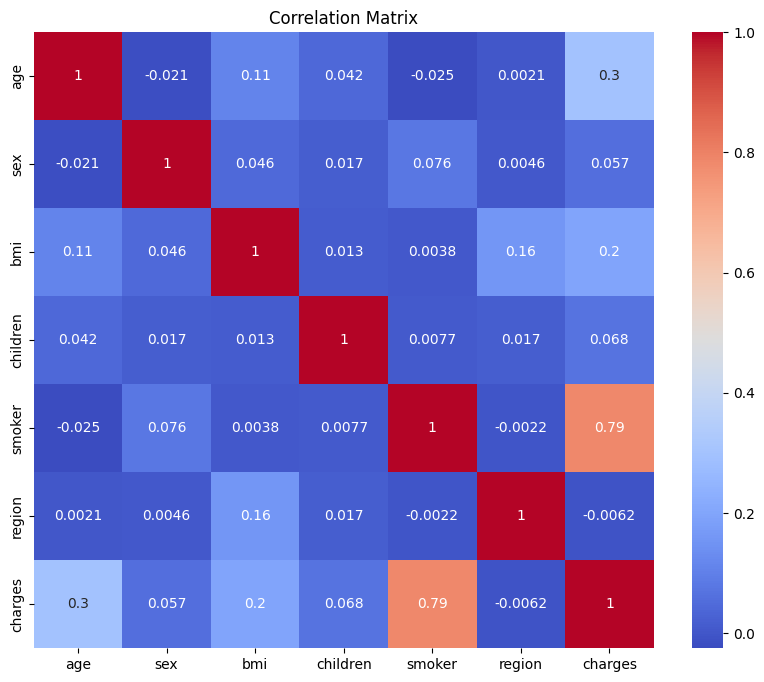

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [44]:
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [45]:
df.replace({'children':{'yes':1,'no':0}},inplace=True)

In [46]:
df.replace({'Region':{'southwest':0,'northeast':1}},inplace=True)

In [47]:
y=df['charges']

In [48]:
y.shape

(1338,)

In [49]:
y

172      1694.79640
1226     6640.54485
428      3167.45585
412     14455.64405
1286     3732.62510
           ...     
286      9432.92530
116     11381.32540
847      2438.05520
1047    44501.39820
1317     1163.46270
Name: charges, Length: 1338, dtype: float64

In [50]:
X=df[['age','sex','bmi','children','smoker','region','charges']]

In [51]:
X=df.drop(['charges'],axis=1)

In [52]:
X.shape

(1338, 6)

In [53]:
X

,age,sex,bmi,children,smoker,region
172,18,1,15.960,0,0,0
1226,38,1,16.815,2,0,0
428,21,0,16.815,1,0,0
412,26,0,17.195,2,1,0
1286,28,0,17.290,0,0,0
...,...,...,...,...,...,...
286,46,0,48.070,2,0,0
116,58,1,49.060,0,0,2
847,23,1,50.380,1,0,2
1047,22,1,52.580,1,1,2


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()

In [56]:
X_std=df[["age","bmi"]]

In [57]:
X_std = sc.fit_transform(X_std)

In [58]:
X_std

array([[-1.50996545, -2.41201109],
       [-0.08594165, -2.27175306],
       [-1.29636188, -2.27175306],
       ...,
       [-1.1539595 ,  3.23439991],
       [-1.22516069,  3.59529777],
       [-1.50996545,  3.68552223]])

In [59]:
X[['age','bmi']]=pd.DataFrame(X_std,columns=['age','bmi'])

In [60]:
X

,age,sex,bmi,children,smoker,region
172,1.266881,1,-1.142307,0,0,0
1226,-1.296362,1,1.447956,2,0,0
428,1.053277,0,-0.495151,1,0,0
412,1.409283,0,-0.518938,2,1,0
1286,-1.153959,0,1.844943,0,0,0
...,...,...,...,...,...,...
286,0.768473,0,-0.830622,2,0,0
116,-0.228344,1,-1.322756,0,0,2
847,0.270064,1,0.317689,1,0,2
1047,-1.296362,1,0.798339,1,1,2


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2529)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the accuracy and loss percentage
accuracy = model.score(X_test, y_test) * 100
loss_percentage = (1 - accuracy/100) * 100

# Print the evaluation metrics, accuracy, and loss percentage
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy:", accuracy, "%")
print("Loss Percentage:", loss_percentage, "%")

Mean Squared Error (MSE): 62392158.419913925
Mean Absolute Error (MAE): 5940.550845754903
R-squared (R2) Score: 0.6288807722988589
Accuracy: 62.88807722988589 %
Loss Percentage: 37.11192277011411 %


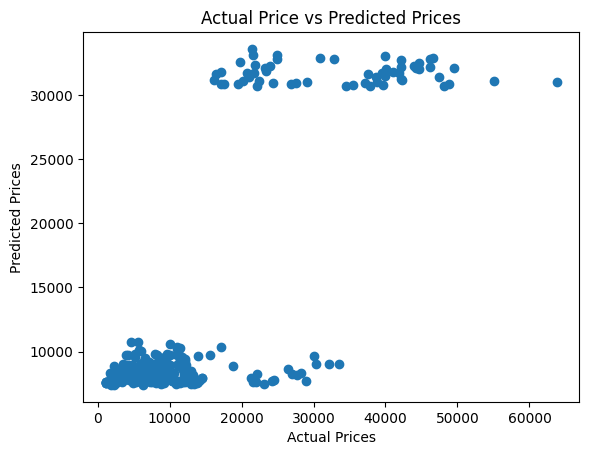

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an XGBoost regressor model and fit it to the training data
xg = xgb.XGBRegressor(random_state=2529)
xg.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = xg.predict(X_test)
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the accuracy and loss percentage
accuracy = xg.score(X_test, y_test) * 100
loss_percentage = (1 - accuracy/100) * 100

# Print the evaluation metrics, accuracy, and loss percentage
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy:", accuracy, "%")
print("Loss Percentage:", loss_percentage, "%")


Mean Squared Error (MSE): 77430815.58738768
Mean Absolute Error (MAE): 6663.553544866415
R-squared (R2) Score: 0.5394282677694797
Accuracy: 53.942826776947975 %
Loss Percentage: 46.057173223052025 %


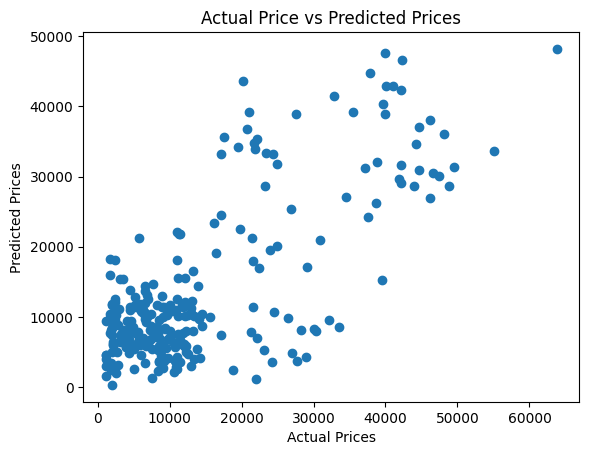

In [70]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [71]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an SVR model
svr = SVR()

# Fit the model to the training data
svr.fit(X_train, y_train)

# Predict using the trained model
y_pred = svr.predict(X_test)

In [72]:
svr.fit(X_train,y_train)

SVR()

In [73]:
y_pred=svr.predict(X_test)

In [74]:
y_pred

array([9399.48507672, 9374.28083482, 9371.28702424, 9380.06022808,
       9393.49909053, 9392.22648909, 9374.0499191 , 9399.08202166,
       9400.93922541, 9399.56307735, 9388.57595367, 9382.6557745 ,
       9413.11410487, 9415.79108898, 9397.75925468, 9388.86655118,
       9378.15441904, 9404.26281889, 9408.82507473, 9392.77842704,
       9396.33927434, 9387.64730616, 9378.8479428 , 9396.02330749,
       9395.59585106, 9381.41464337, 9400.50002992, 9384.45562362,
       9392.71348953, 9378.25490524, 9376.44245391, 9403.63863703,
       9407.50692141, 9375.79719836, 9373.51049214, 9389.43623848,
       9374.84329315, 9415.3582597 , 9405.71570144, 9382.36275658,
       9376.32627089, 9389.5668151 , 9388.64910667, 9376.16411136,
       9396.54522297, 9386.87625873, 9384.37715526, 9397.96432458,
       9398.29044324, 9378.28027964, 9386.62148982, 9381.4826418 ,
       9404.655647  , 9371.82872323, 9398.5088194 , 9413.80484261,
       9372.05677905, 9399.70150374, 9411.70178992, 9397.30176

In [ ]:
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the accuracy and loss percentage
accuracy = svr.score(X_test, y_test) * 100
loss_percentage = (1 - accuracy/100) * 100

# Print the evaluation metrics, accuracy, and loss percentage
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy:", accuracy, "%")
print("Loss Percentage:", loss_percentage, "%")


Mean Squared Error (MSE): 189163094.18681872
Mean Absolute Error (MAE): 9095.80896418551
R-squared (R2) Score: -0.12517443220498925
Accuracy: -12.517443220498926 %
Loss Percentage: 112.51744322049892 %


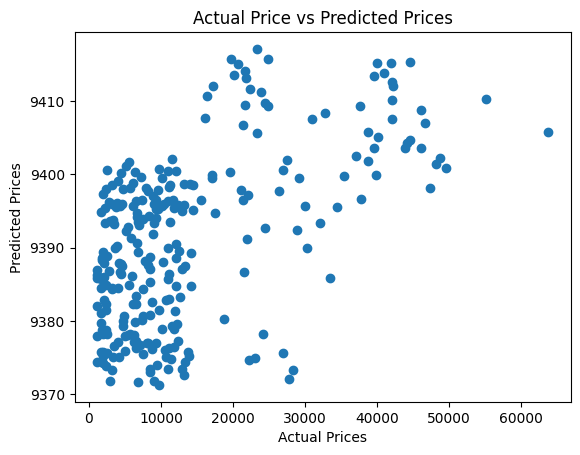

In [75]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rfr=RandomForestRegressor(random_state=2429)

In [78]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2429)

In [79]:
y_pred=rfr.predict(X_test)

In [80]:
y_pred.shape

(268,)

In [81]:
y_pred

array([ 8413.1144183 ,  6641.7307488 ,  7670.8604108 ,  6379.7686976 ,
        7750.9033058 , 12267.3002678 ,  7782.4539012 ,  8005.6355547 ,
       37933.9467098 , 29857.6270597 ,  8586.7239759 ,  6645.1752496 ,
       31494.1008865 , 26068.380497  , 11838.1224318 , 12464.8293119 ,
        6288.2239362 , 32508.5647457 , 27802.07931   ,  8515.8412065 ,
       11997.5592703 ,  8772.8052432 ,  8285.3412342 ,  8887.3318466 ,
        7410.9396473 ,  7861.0218628 , 11874.2134957 ,  8838.5461281 ,
       10878.3413591 ,  6424.2865212 , 10698.1888695 , 32775.773787  ,
       27378.5537854 ,  5903.0007627 ,  7409.5458477 ,  8804.3899979 ,
        5175.2195736 , 30479.3554057 , 32141.821996  ,  7588.8957205 ,
        6290.1322303 ,  5604.8212129 ,  6106.1173607 ,  6426.4341042 ,
        7383.1489305 ,  7482.2794651 ,  4325.6038941 ,  9971.213869  ,
        9745.8140038 ,  9315.697162  ,  9665.2368085 , 11333.8099908 ,
       32159.3942183 ,  7340.8188182 , 10832.72178348, 24776.2519497 ,
      

In [82]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 67947200.0233078
Mean Absolute Error (MAE): 6193.306365084888
R-squared (R2) Score: 0.5958384348976696


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)

# Create and train the Random Forest Regression model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfr.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the accuracy and loss percentage
accuracy = rfr.score(X_test, y_test) * 100
loss_percentage = (1 - accuracy/100) * 100

# Print the evaluation metrics, accuracy, and loss percentage
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Accuracy:", accuracy, "%")
print("Loss Percentage:", loss_percentage, "%")


Mean Squared Error (MSE): 67179575.3315065
Mean Absolute Error (MAE): 6176.035127025113
R-squared (R2) Score: 0.6004043978327602
Accuracy: 60.04043978327602 %
Loss Percentage: 39.95956021672398 %


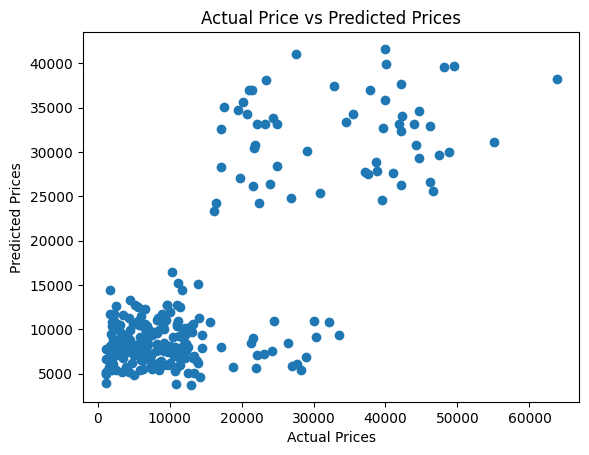

In [84]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [85]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor model
dtr = DecisionTreeRegressor(random_state=2529)

# Fit the model to the training data
dtr.fit(X_train, y_train)

# Predict using the trained model
y_pred = dtr.predict(X_test)

In [86]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2529)

In [87]:
y_pred=dtr.predict(X_test)

In [88]:
y_pred.shape

(268,)

In [89]:
y_pred

array([12949.1554 ,  2457.502  , 13390.559  ,  9193.8385 ,  4347.02335,
        3393.35635, 10085.846  ,  8606.2174 , 47269.854  , 28101.33305,
        1532.4697 ,  5377.4578 , 16776.30405, 16776.30405, 12485.8009 ,
        8835.26495, 11837.16   , 19719.6947 , 17663.1442 ,  8930.93455,
       24671.66334,  7144.86265,  8017.06115, 12797.20962,  8534.6718 ,
       10825.2537 , 24671.66334, 14349.8544 , 12557.6053 ,  5012.471  ,
       14313.8463 , 36837.467  , 24180.9335 ,  1639.5631 ,  5976.8311 ,
       10600.5483 ,  5240.765  , 16776.30405, 39241.442  ,  6664.68595,
        2632.992  ,  1815.8759 ,  5125.2157 , 21232.18226,  5354.07465,
       10982.5013 ,  1391.5287 , 13228.84695,  7228.21565, 13457.9608 ,
       12950.0712 ,  3591.48   , 24667.419  ,  1628.4709 ,  6555.07035,
       20009.63365,  5028.1466 , 27375.90478, 17560.37975, 23045.56616,
        8825.086  , 11658.11505,  7077.1894 , 13012.20865, 24059.68019,
       25081.76784, 19442.3535 , 25656.57526,  9182.17   , 26467

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)

# Create and train the Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtr.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
accuracy = dtr.score(X_test, y_test) * 100
loss_percentage = (1 - accuracy/100) * 100
print("Accuracy:", accuracy, "%")
print("Loss Percentage:", loss_percentage, "%")


Mean Squared Error (MSE): 136998615.534039
Mean Absolute Error (MAE): 8348.608139216416
R-squared (R2) Score: 0.1851088072489181
Accuracy: 18.51088072489181 %
Loss Percentage: 81.4891192751082 %


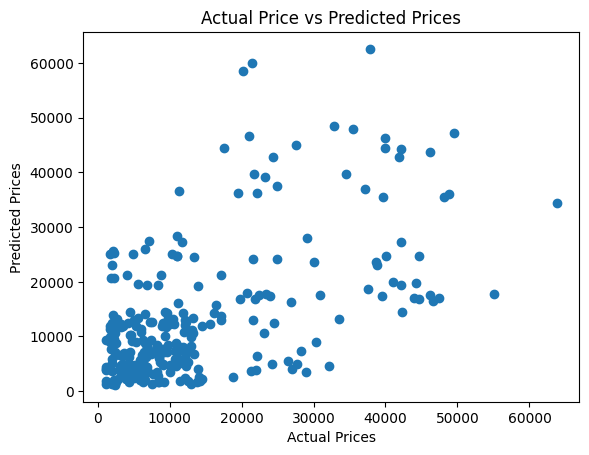

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()